In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from Excel
file_path = "/Development sample_worked.xlsx"  # Replace "your_file_path.xlsx" with the actual file path
data = pd.read_excel(file_path)

In [49]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head(10))

First few rows of the dataset:
         ID  customer_id     application_date  target  Var1  Var2  Var3  \
0  11034977     32537148  2010-02-01 00:00:00     0.0     1   2.0   1.0   
1  11034978     32761663  2010-02-01 00:00:00     0.0     1   1.0   2.0   
2  11034979     32701063  2010-02-01 00:00:00     0.0     2   3.0   1.0   
3  11034980     32386786  2010-02-01 00:00:00     0.0     3   1.0   2.0   
4  11034981     32692110  2010-02-02 00:00:00     NaN     1   2.0   1.0   
5  11034982     32861919  2010-02-02 00:00:00     0.0     1   2.0   1.0   
6  11034983     32361511  2010-02-03 00:00:00     NaN     1   2.0   1.0   
7  11034984     32871226  2010-02-03 00:00:00     0.0     1   1.0   1.0   
8  11034985     32722363  2010-02-03 00:00:00     NaN     1   1.0   1.0   
9  11034986     32381161  2010-02-04 00:00:00     0.0     2   1.0   1.0   

    Var4  Var5  Var6  ...  Where 22   Where 23  Where 24  Where 25   Where 26  \
0   7800    99     1  ...         1          1         0   676

In [50]:
# Display the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(data.tail(5))


Last few rows of the dataset:
             ID  customer_id     application_date  target  Var1  Var2  Var3  \
49995  11084972     32554904  2020-12-31 00:00:00     1.0     2   1.0   1.0   
49996  11084973     32884069  2020-12-31 00:00:00     NaN     1   2.0   1.0   
49997  11084974     32433438  2020-12-31 00:00:00     0.0     1   1.0   1.0   
49998  11084975     32877592  2020-12-31 00:00:00     NaN     1   1.0   4.0   
49999  11084976     32834539  2020-12-31 00:00:00     0.0     1   3.0   3.0   

        Var4  Var5  Var6  ...  Where 22   Where 23  Where 24  Where 25  \
49995  49200   111     1  ...         2          2         0       NaN   
49996  25600    30     1  ...         3          4         0       NaN   
49997  46700    18     1  ...         0          0         0   9288.87   
49998  44300   162     3  ...         3          3    102000       NaN   
49999   6400     9     1  ...         0          0         0       NaN   

        Where 26  Where 27  Where 28   Where 29  

In [51]:
# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(50000, 35)


In [52]:
# Check the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
ID                    int64
customer_id           int64
application_date     object
target              float64
Var1                  int64
Var2                float64
Var3                float64
Var4                  int64
Var5                  int64
Var6                  int64
Var7                 object
Var8                float64
Var9                 object
Var10                object
Var11                 int64
Var12                object
Var13                object
Var14                 int64
Var15                 int64
Var16                 int64
Var17               float64
Var18               float64
Var19               float64
Var20                object
 Where 21            object
 Where 22            object
 Where 23            object
 Where 24            object
 Where 25            object
 Where 26            object
 Where 27           float64
 Where 28           float64
 Where 29           float64
 Where 30           float64
_r_                 

In [53]:
# Compute descriptive statistics
print("\nDescriptive statistics of numerical features:")
print(data.describe())


Descriptive statistics of numerical features:
                 ID   customer_id        target         Var1          Var2  \
count  5.000000e+04  5.000000e+04  36718.000000  50000.00000  48597.000000   
mean   1.105998e+07  3.262894e+07      0.030693      1.33786      1.915098   
std    1.443390e+04  1.537429e+05      0.172488      0.66462      0.861268   
min    1.103498e+07  3.236142e+07      0.000000      1.00000      1.000000   
25%    1.104748e+07  3.249680e+07      0.000000      1.00000      1.000000   
50%    1.105998e+07  3.263026e+07      0.000000      1.00000      2.000000   
75%    1.107248e+07  3.276254e+07      0.000000      1.00000      3.000000   
max    1.108498e+07  3.289438e+07      1.000000      4.00000      3.000000   

               Var3          Var4          Var5         Var6           Var8  \
count  48597.000000  50000.000000  50000.000000  50000.00000   20827.000000   
mean       1.687141  17123.466000     42.141900      1.54724   35911.341048   
std        0.

In [54]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
ID                      0
customer_id             0
application_date        0
target              13282
Var1                    0
Var2                 1403
Var3                 1403
Var4                    0
Var5                    0
Var6                    0
Var7                    0
Var8                29173
Var9                    0
Var10               37537
Var11                   0
Var12               37536
Var13                   0
Var14                   0
Var15                   0
Var16                   0
Var17                  40
Var18               37416
Var19               29173
Var20                   0
 Where 21               3
 Where 22              13
 Where 23              46
 Where 24              81
 Where 25           10092
 Where 26           19853
 Where 27              51
 Where 28              57
 Where 29              57
 Where 30              81
_r_                   235
dtype: int64


In [56]:
# Calculate the target rate
target_rate = data['target'].mean() * 100  # Multiply by 100 to get percentage
print(f"\nTarget rate (probability of default): {target_rate:.2f}%")


Target rate (probability of default): 3.07%


In [57]:
# Categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\n{feature} distribution:")
    print(data[feature].value_counts(normalize=True))


application_date distribution:
application_date
2019-10-09 00:00:00    0.00060
2019-11-14 00:00:00    0.00060
2018-08-07 00:00:00    0.00058
2020-01-12 00:00:00    0.00054
2019-06-12 00:00:00    0.00052
                        ...   
24Ap r2016 0:00:00     0.00002
2010-02-17 00:00:00    0.00002
2010-10-04 00:00:00    0.00002
2010-03-02 00:00:00    0.00002
2010-04-06 00:00:00    0.00002
Name: proportion, Length: 3988, dtype: float64

Var7 distribution:
Var7
323.87     0.00068
740.28     0.00064
971.61     0.00062
763.41     0.00058
890.64     0.00058
            ...   
168.62     0.00002
831.87     0.00002
2844.66    0.00002
2301.03    0.00002
3963.94    0.00002
Name: proportion, Length: 23081, dtype: float64

Var9 distribution:
Var9
0        0.01000
6120     0.00866
6480     0.00836
6960     0.00828
7560     0.00820
          ...   
13680    0.00002
16920    0.00002
13200    0.00002
13320    0.00002
32160    0.00002
Name: proportion, Length: 394, dtype: float64

Var10 distribution:
Va

In [21]:
# Drop datetime columns
data_numeric = data.select_dtypes(exclude=[datetime])

NameError: name 'datetime' is not defined

In [62]:
# OR (alternative syntax, if only dropping one column)
data1 = data.drop('application_date', axis=1)

In [63]:
# Correlation matrix
corr_matrix = data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: '1764 .32'

# New Section

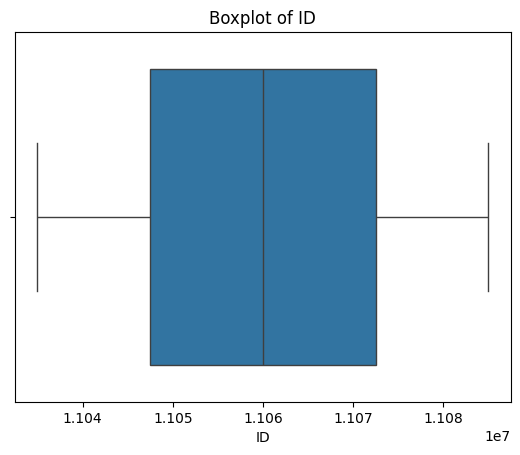

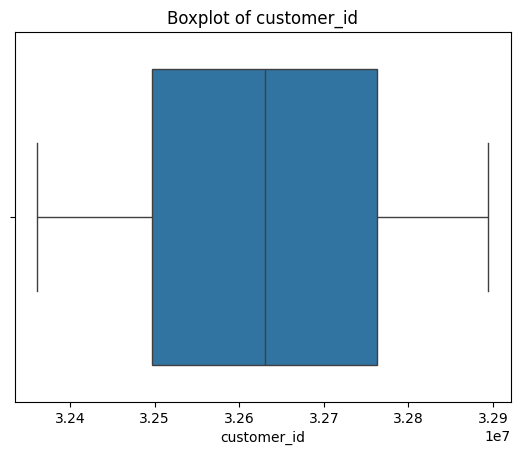

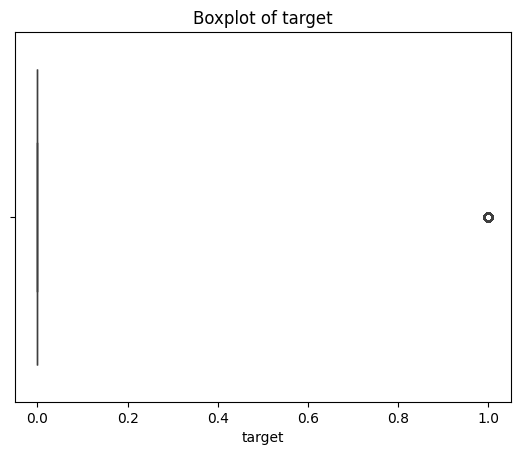

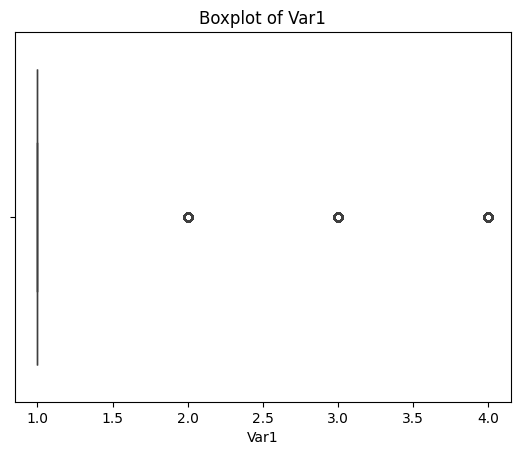

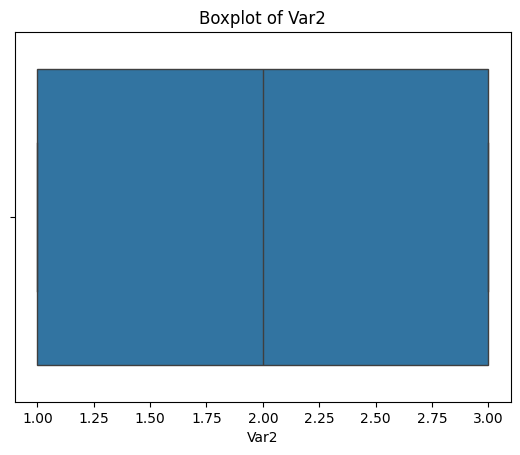

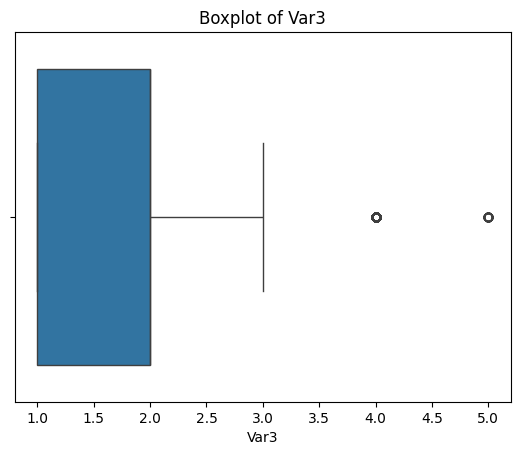

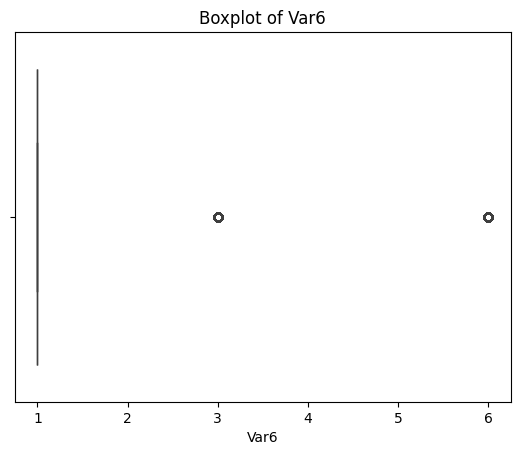

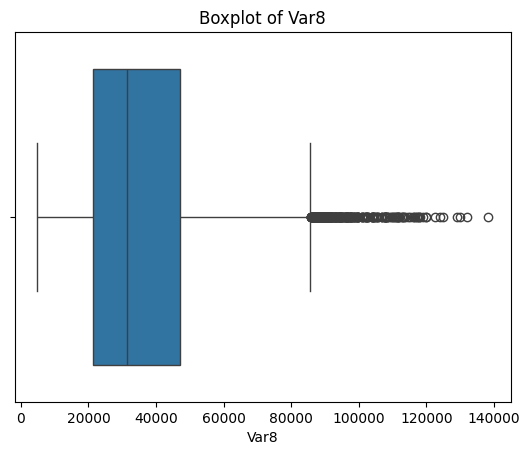

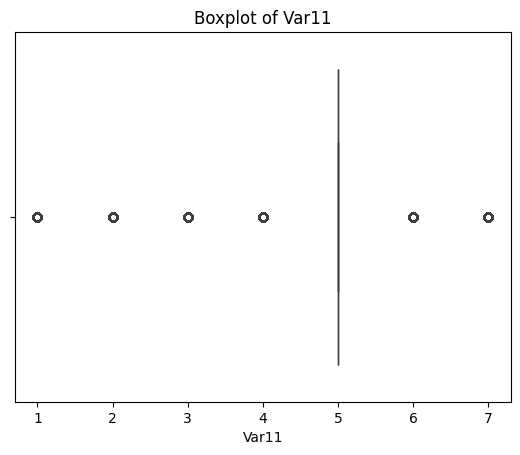

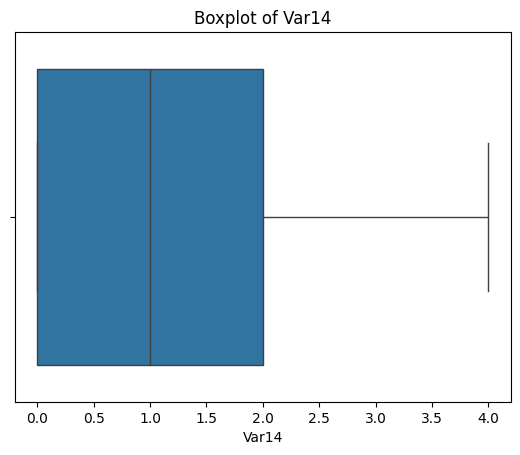

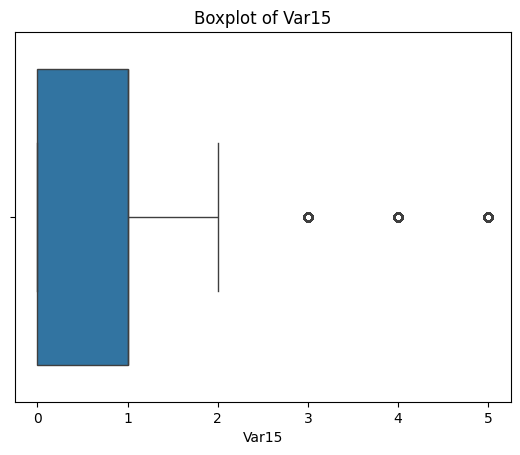

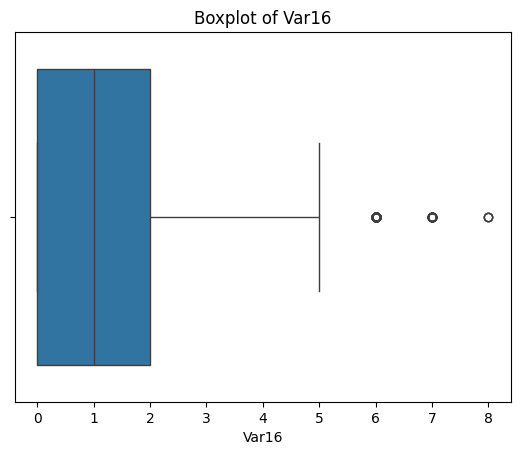

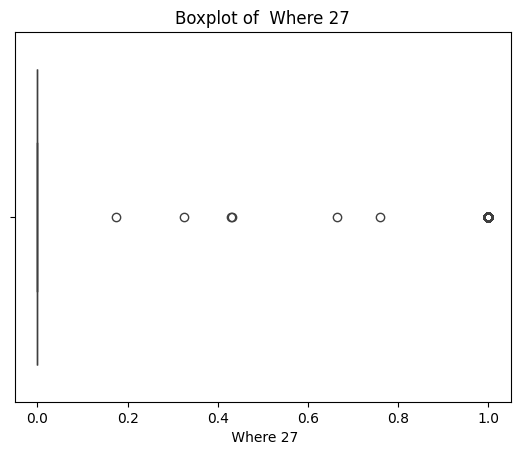

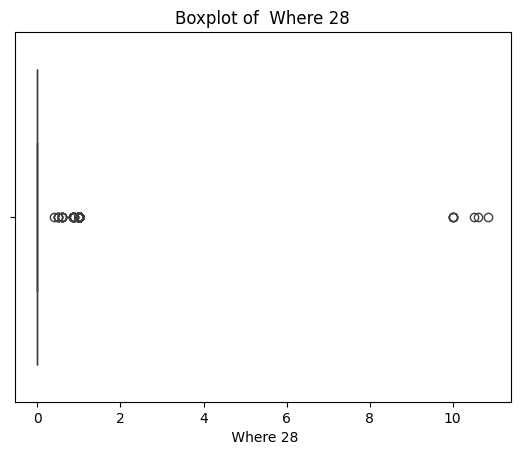

In [14]:
# Outlier detection (example for numerical features)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

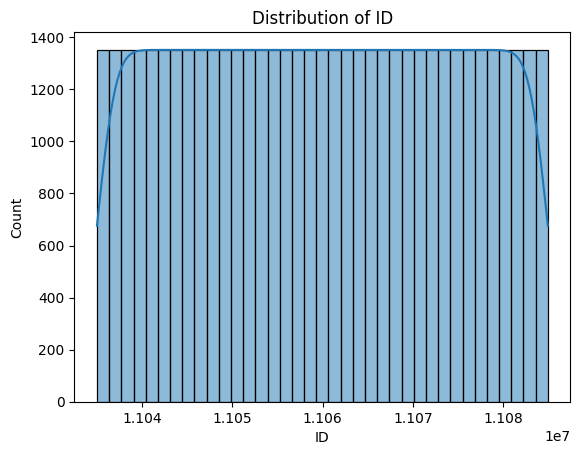

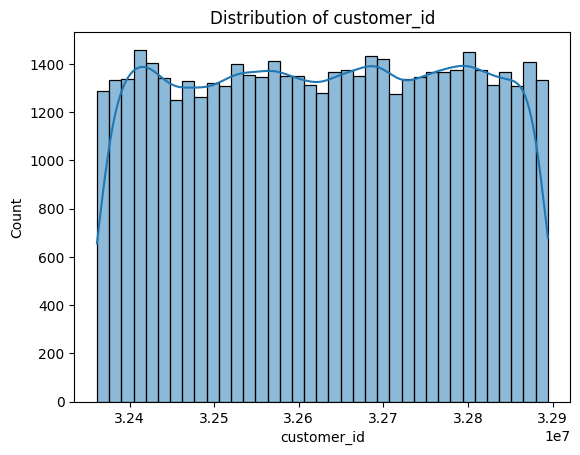

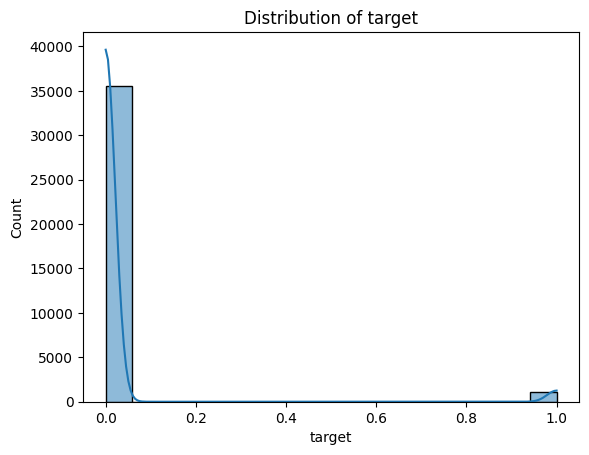

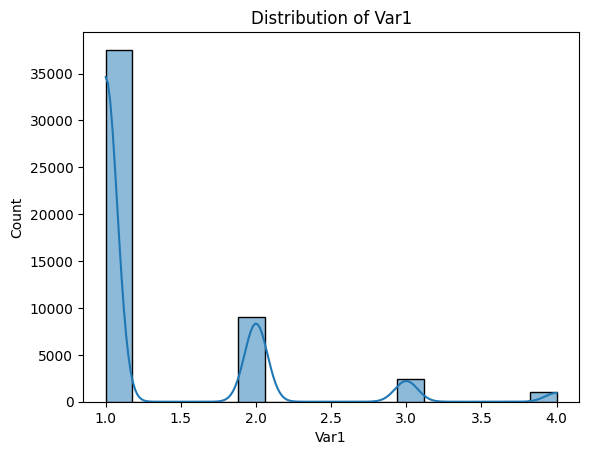

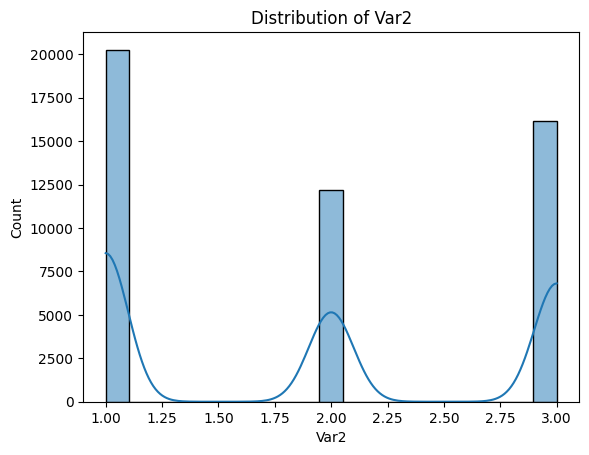

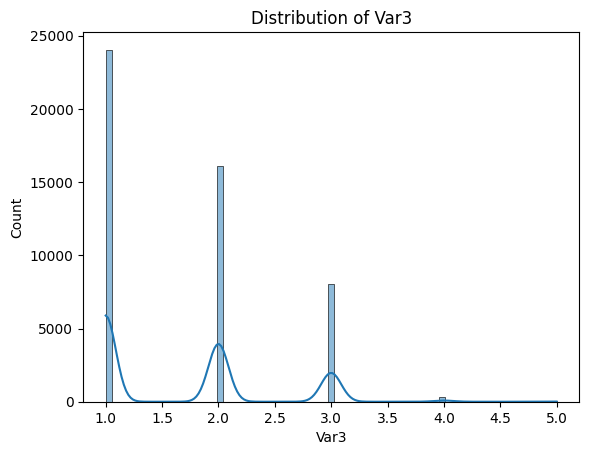

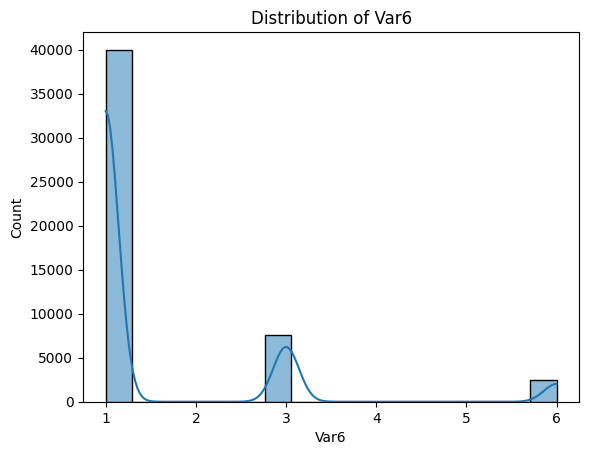

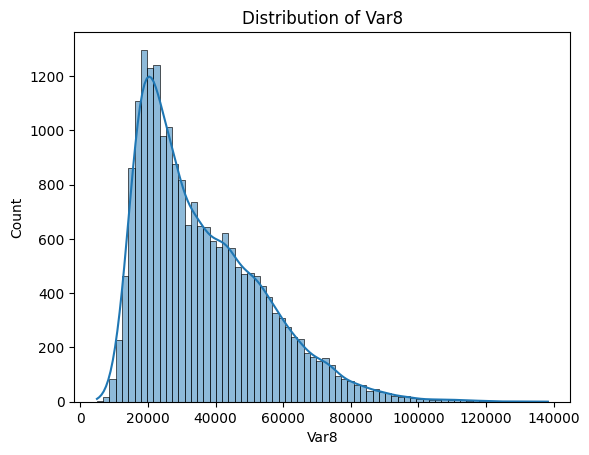

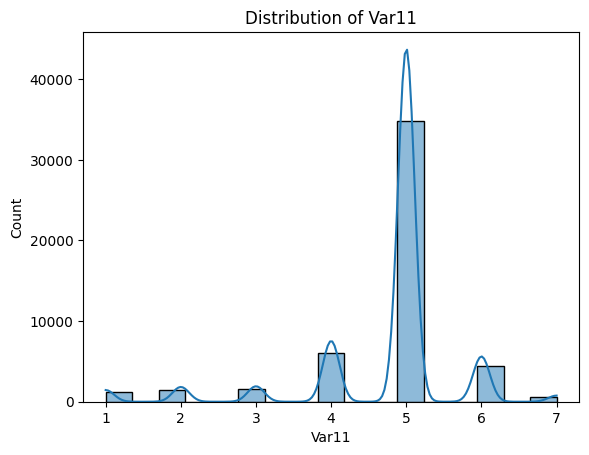

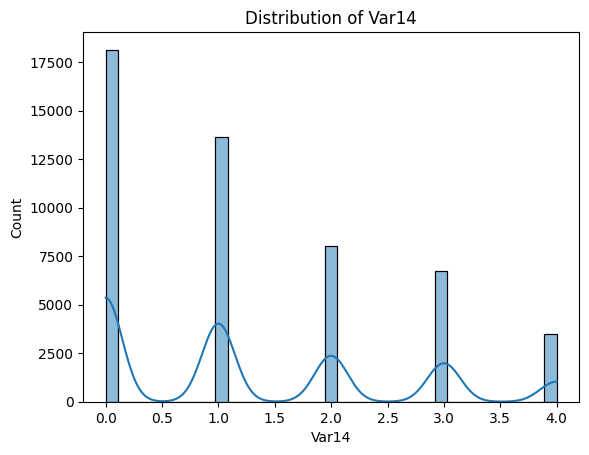

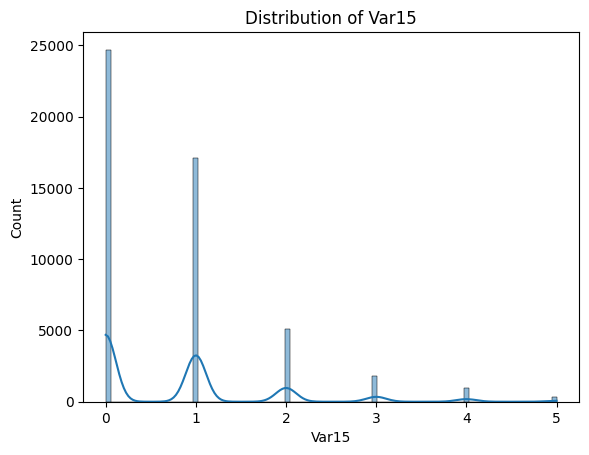

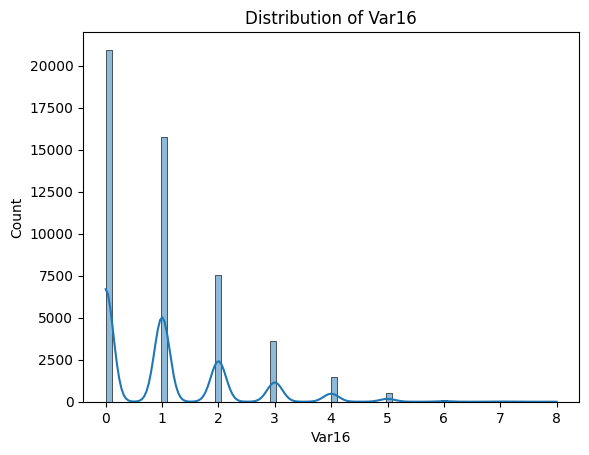

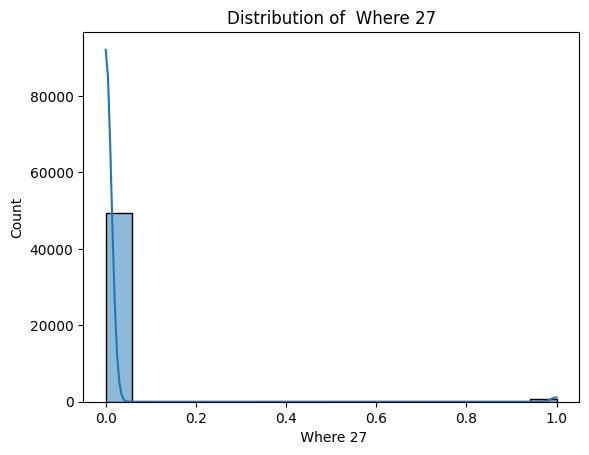

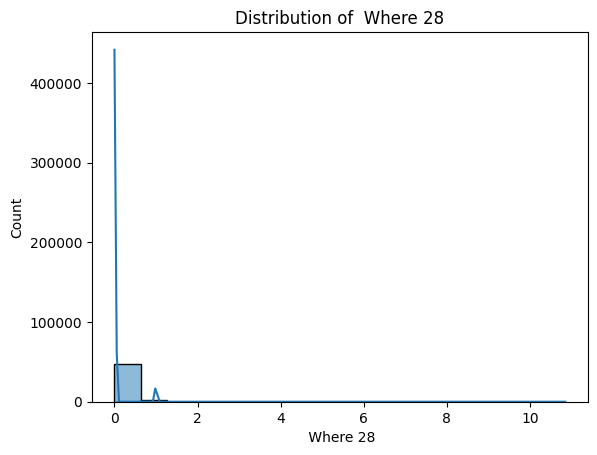

In [15]:
# Data distributions (example for numerical features)
for feature in numerical_features:
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [ ]:
# Assuming you have a DataFrame 'data' containing features (X) and target variable (y)
# Extracting features and target variable
X = data.drop(columns=['target'])  # Assuming 'target_column' is the name of the target variable
y = data['target']

# Convert non-numeric columns to numeric types
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# Drop columns with missing values
X_numeric = X_numeric.dropna(axis=1)

# Add a constant column to the features
X_with_intercept = sm.add_constant(X_numeric)

# Check for multicollinearity using VIF
vif = pd.DataFrame()
vif["Features"] = X_with_intercept.columns
vif["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]

# Display VIF values
print(vif)

  Features        VIF
0    const  32.051957
1     Var1   1.000098
2     Var6   1.000066
3    Var11   1.000097
4    Var14   1.043247
5    Var15   3.365605
6    Var16   3.319821


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your logistic regression model and made predictions on both training and testing data
# Let's say you have 'y_train_pred' and 'y_test_pred' as the predicted labels for training and testing data respectively

# Calculate performance metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate performance metrics for testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the results
print("Performance metrics for training data:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

print("\nPerformance metrics for testing data:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

NameError: name 'y_train' is not defined

Descriptive statistics:
                 ID   customer_id        target         Var1          Var2  \
count  5.000000e+04  5.000000e+04  36718.000000  50000.00000  48597.000000   
mean   1.105998e+07  3.262894e+07      0.030693      1.33786      1.915098   
std    1.443390e+04  1.537429e+05      0.172488      0.66462      0.861268   
min    1.103498e+07  3.236142e+07      0.000000      1.00000      1.000000   
25%    1.104748e+07  3.249680e+07      0.000000      1.00000      1.000000   
50%    1.105998e+07  3.263026e+07      0.000000      1.00000      2.000000   
75%    1.107248e+07  3.276254e+07      0.000000      1.00000      3.000000   
max    1.108498e+07  3.289438e+07      1.000000      4.00000      3.000000   

               Var4          Var5         Var6          Var7           Var8  \
count  50000.000000  50000.000000  50000.00000  50000.000000   20827.000000   
mean   17123.466000     42.141900      1.54724   1330.747722   35911.341048   
std    12217.178461     45.378778   

<ipython-input-5-7a8c23cbc4b6>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


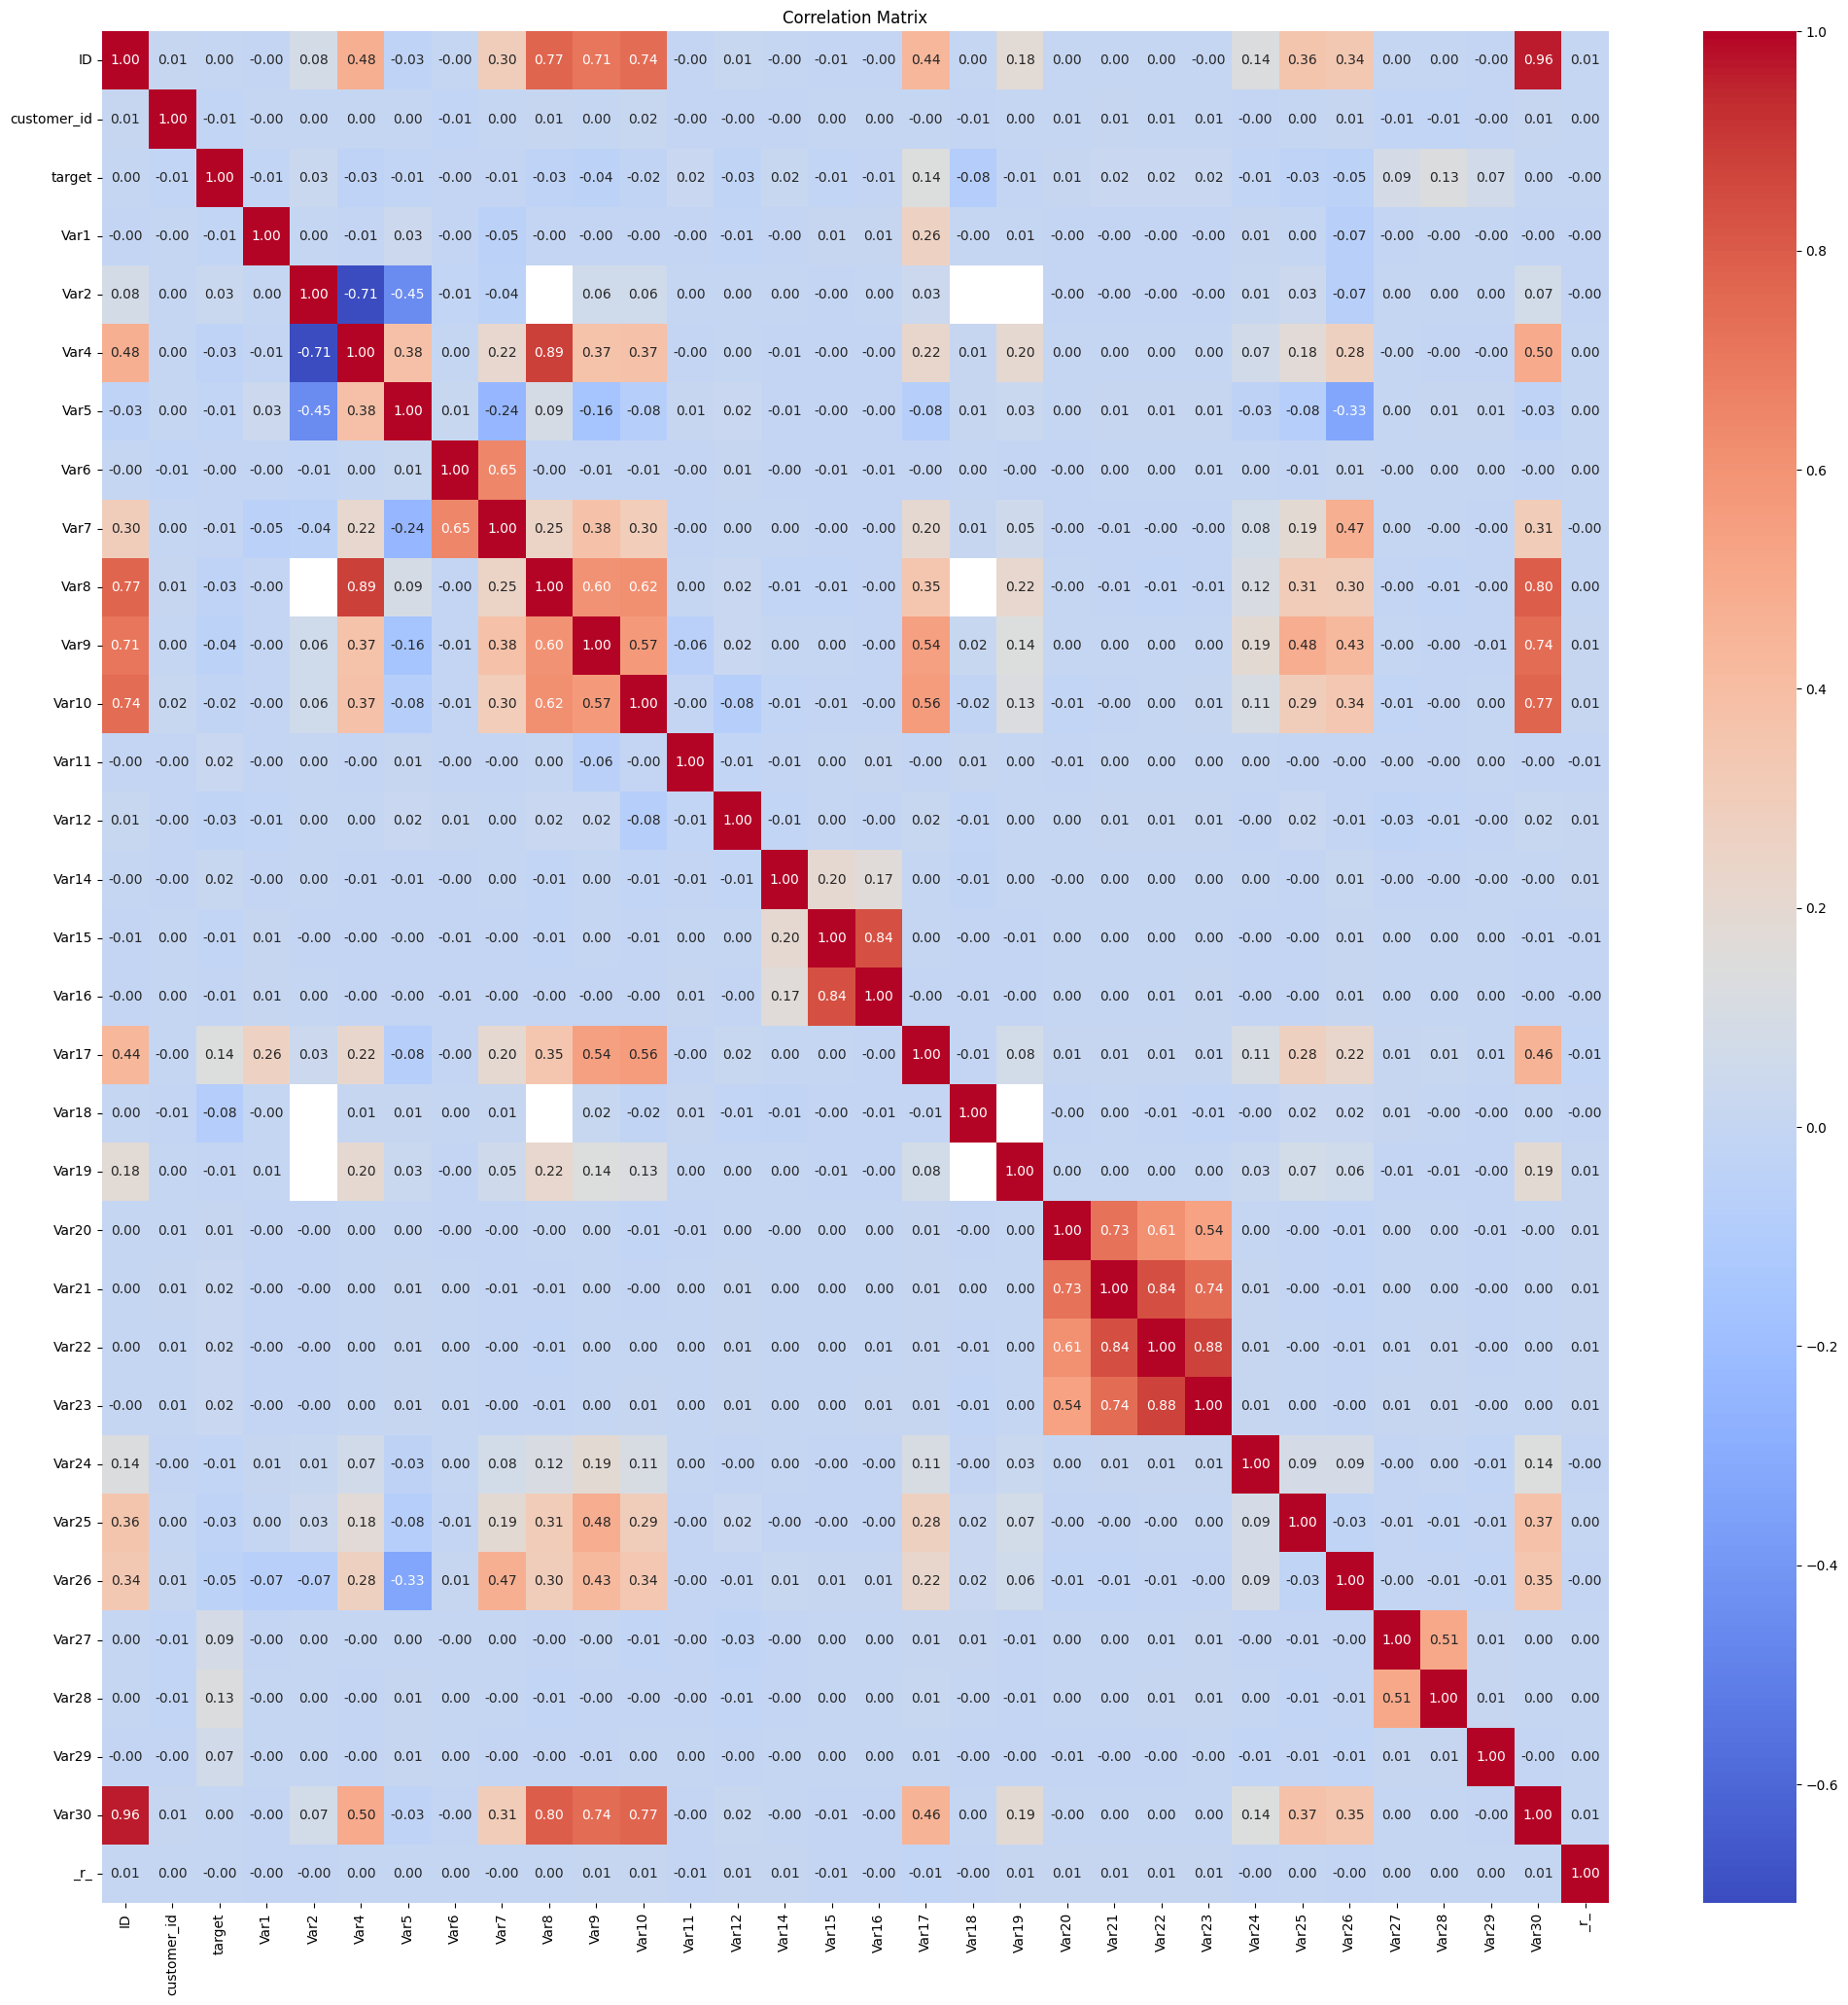

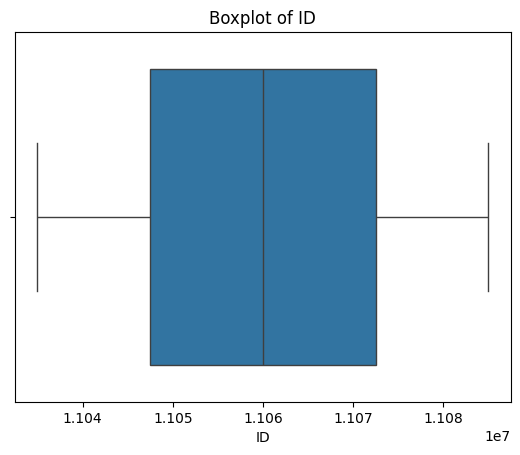

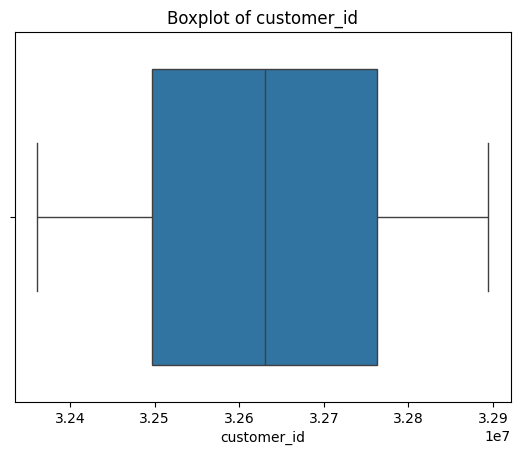

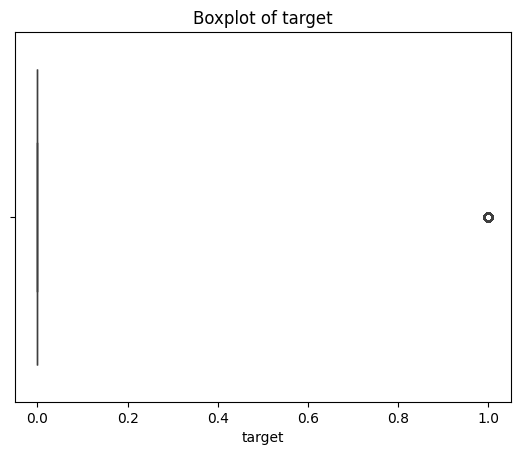

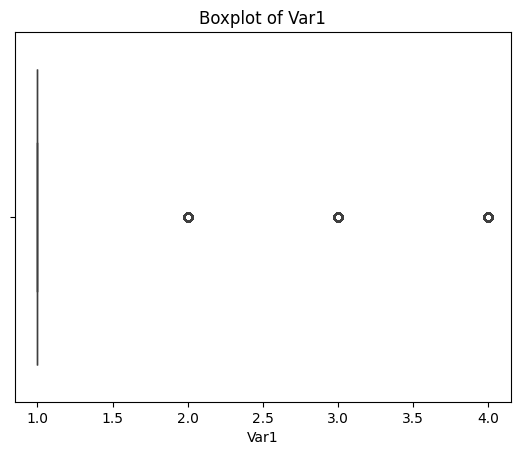

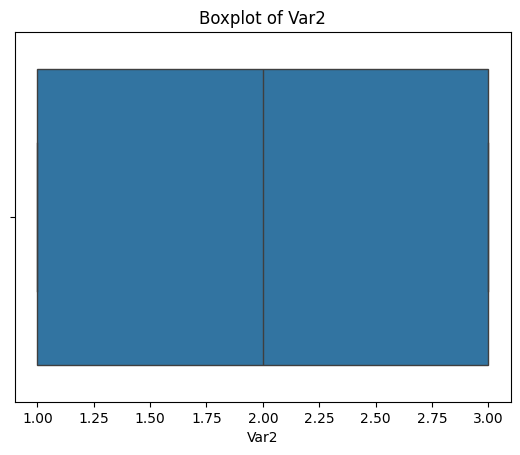

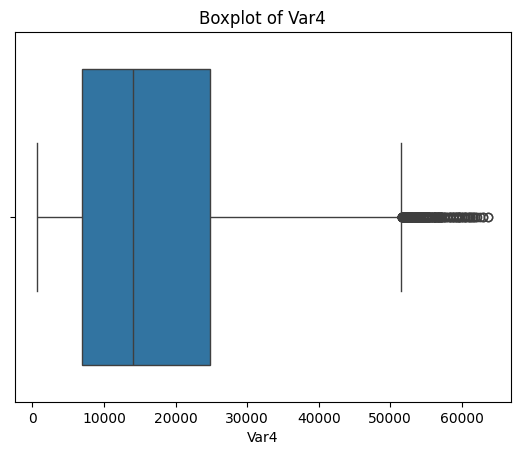

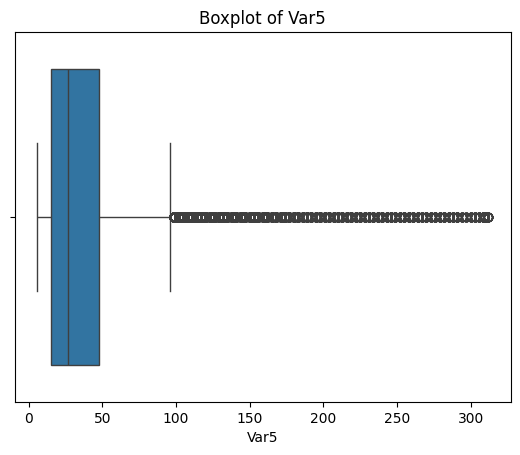

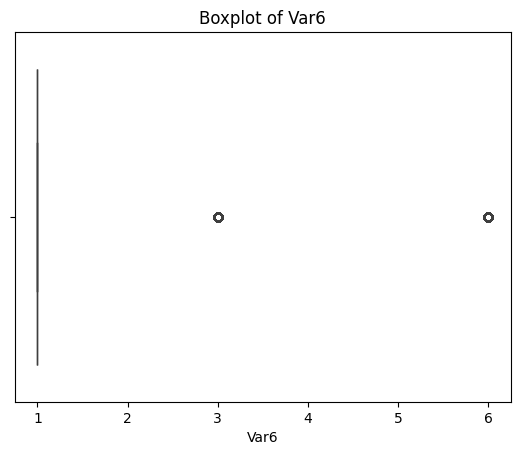

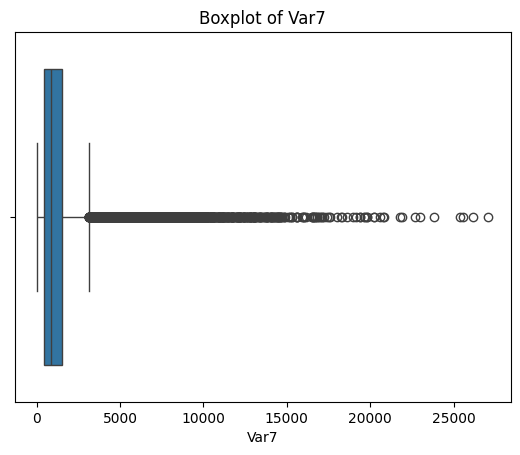

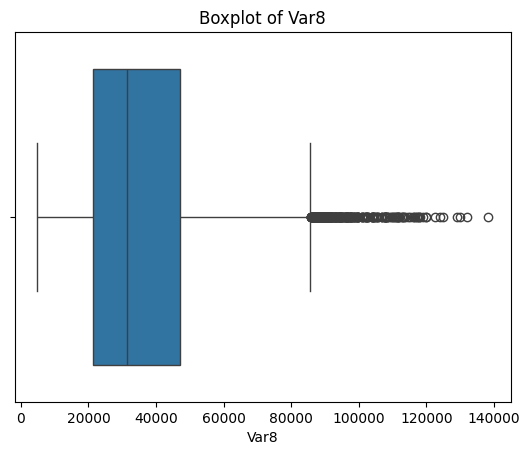

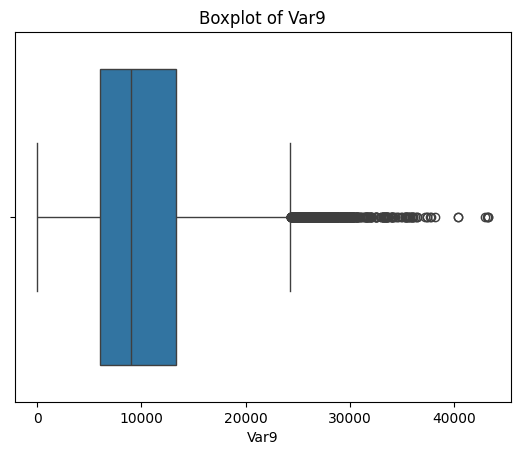

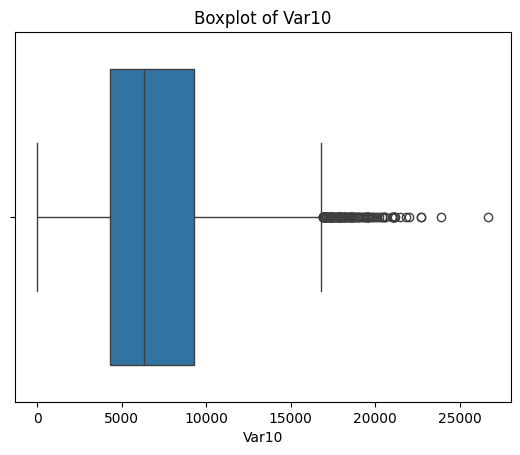

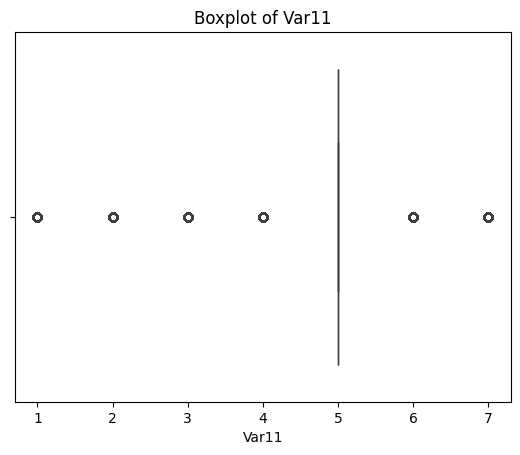

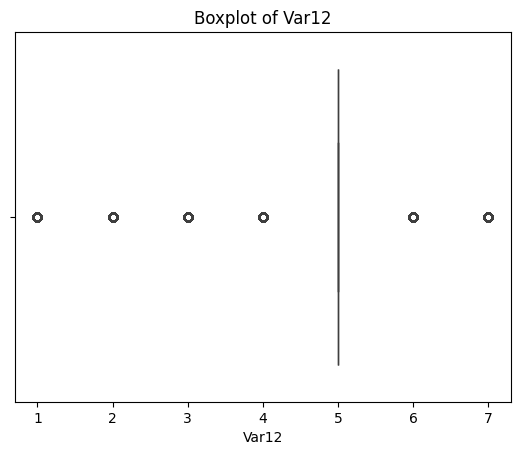

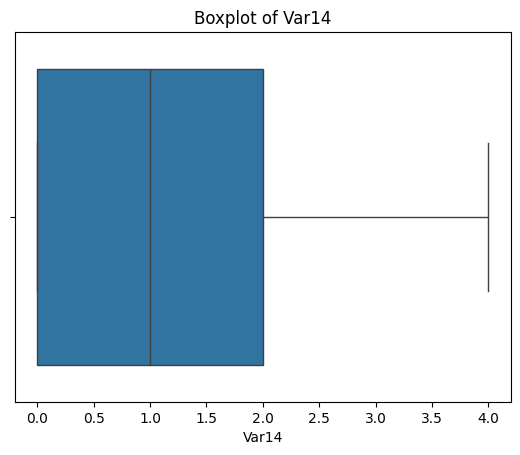

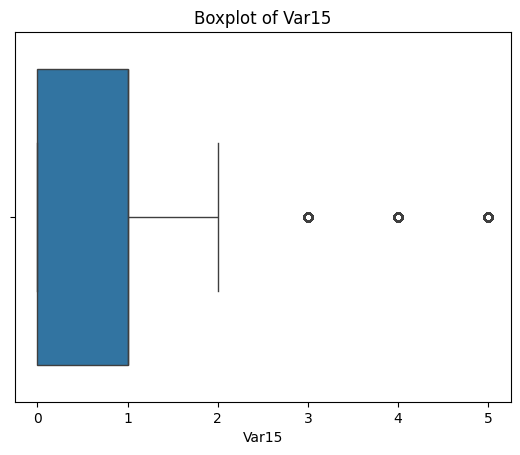

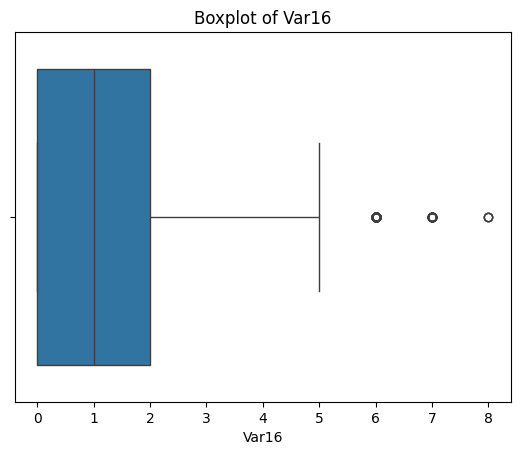

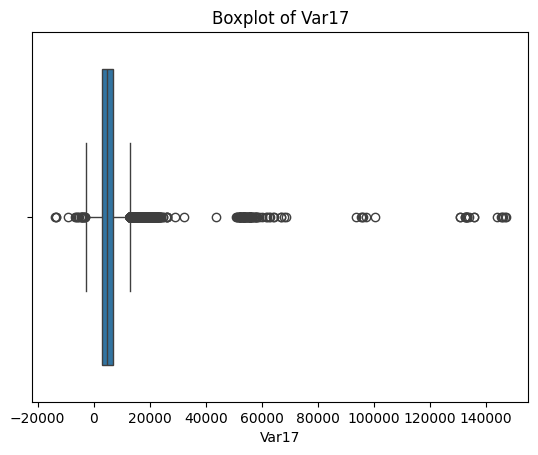

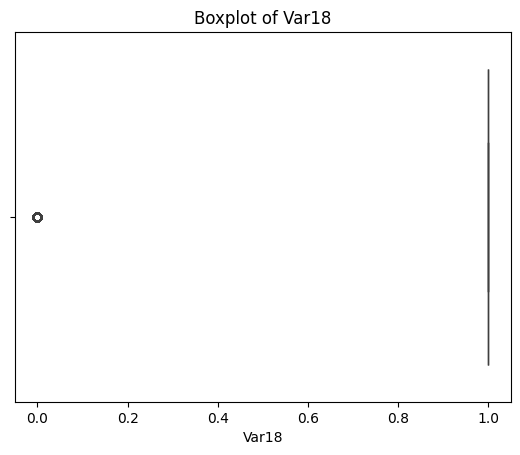

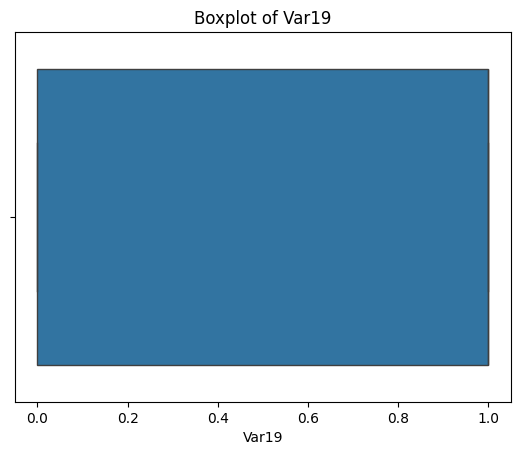

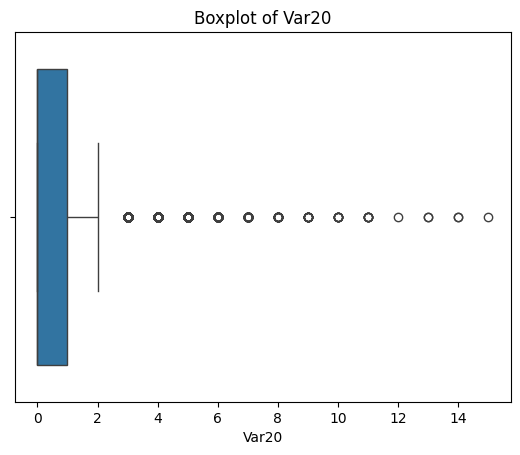

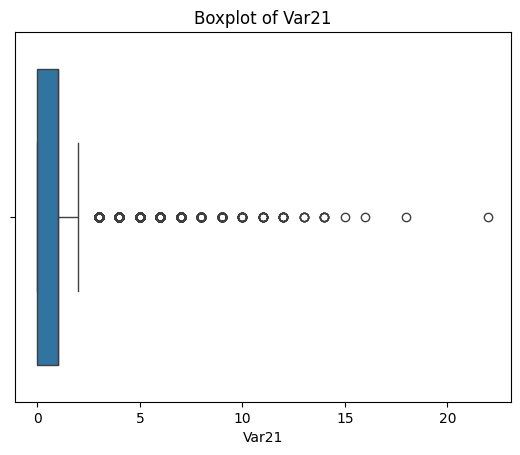

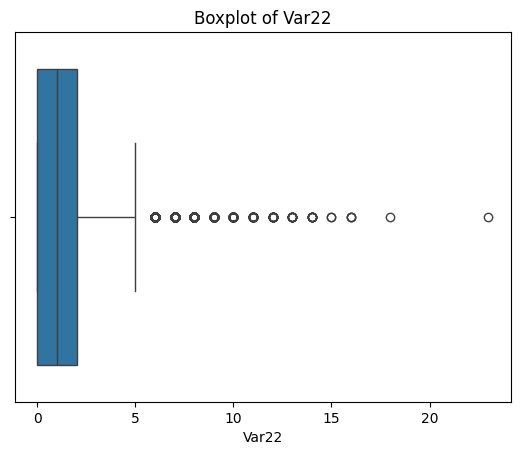

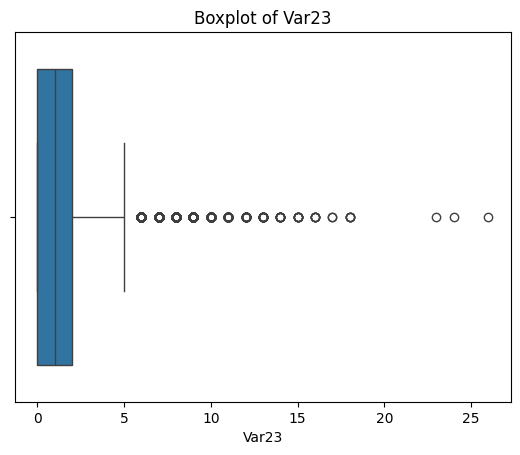

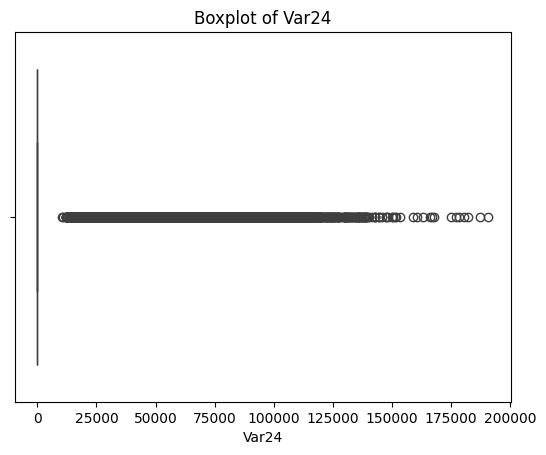

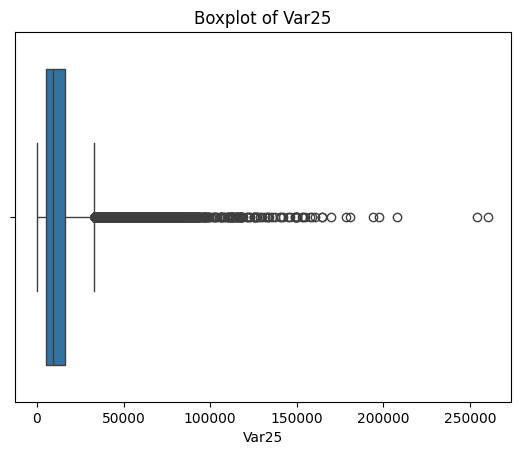

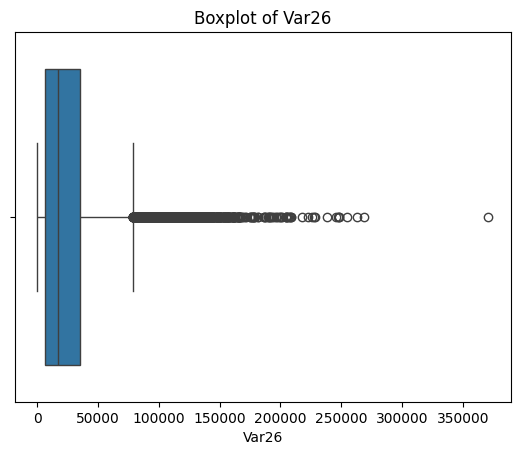

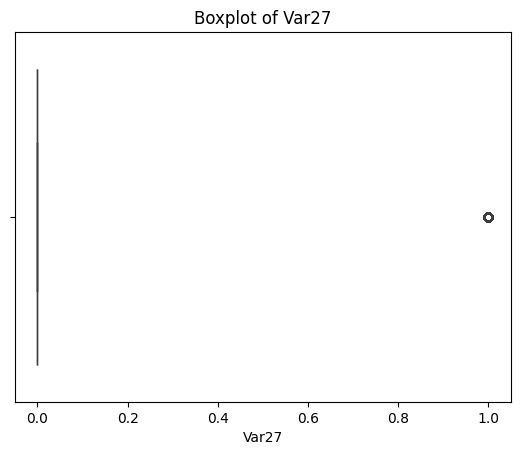

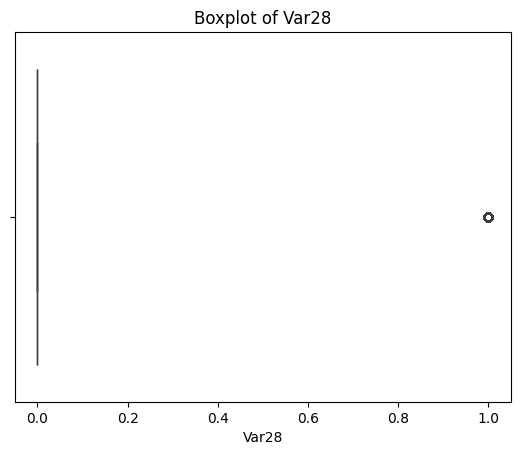

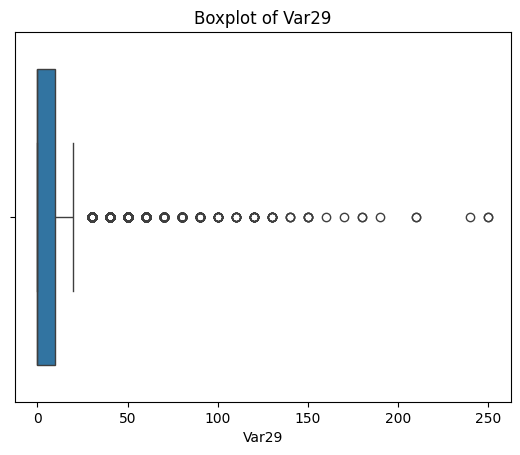

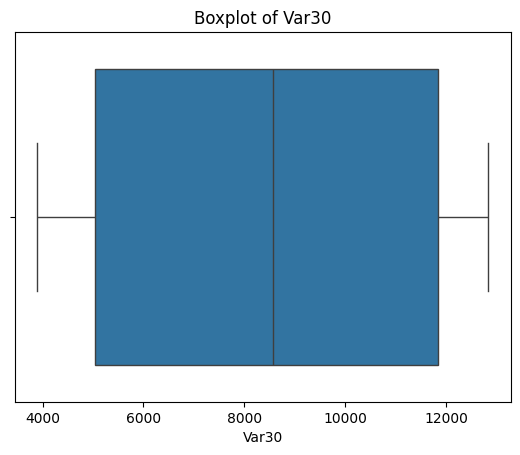

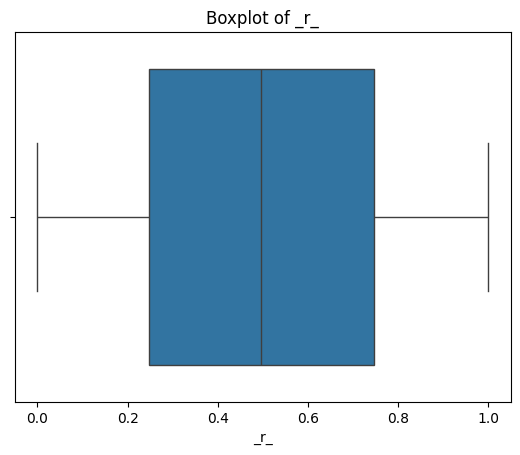

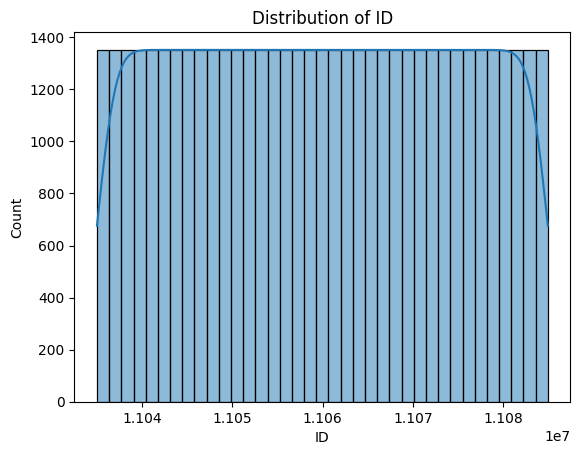

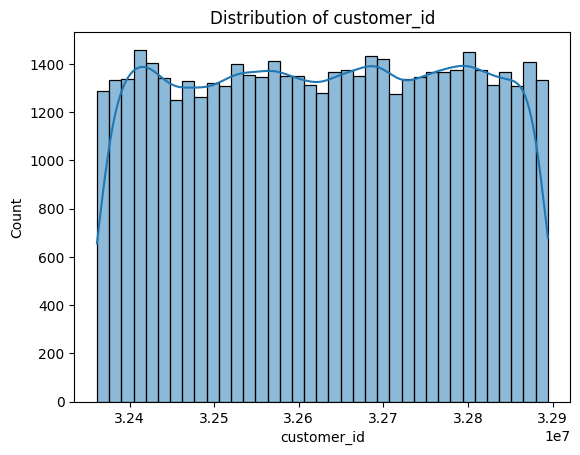

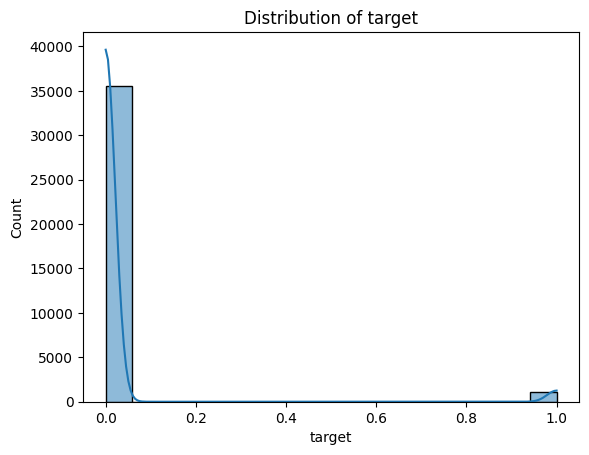

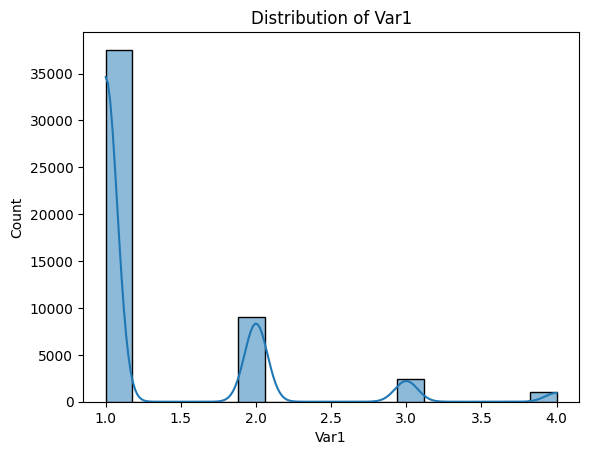

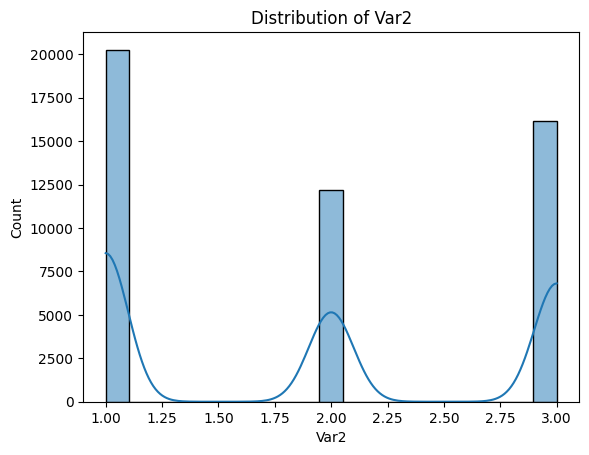

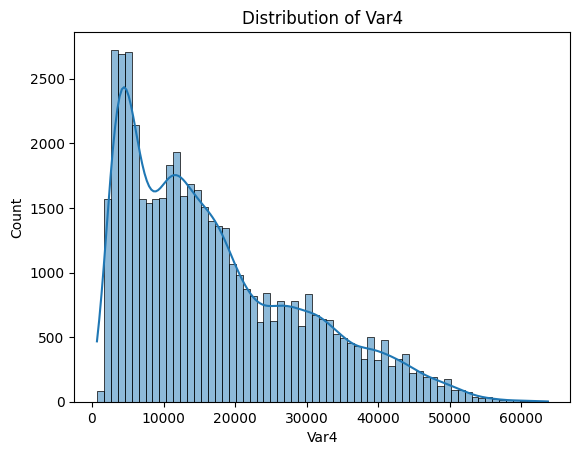

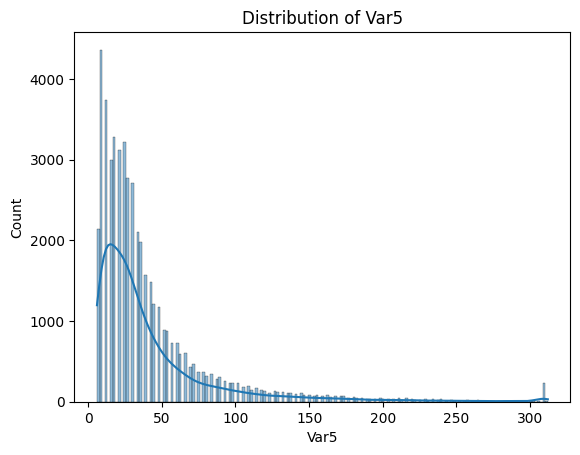

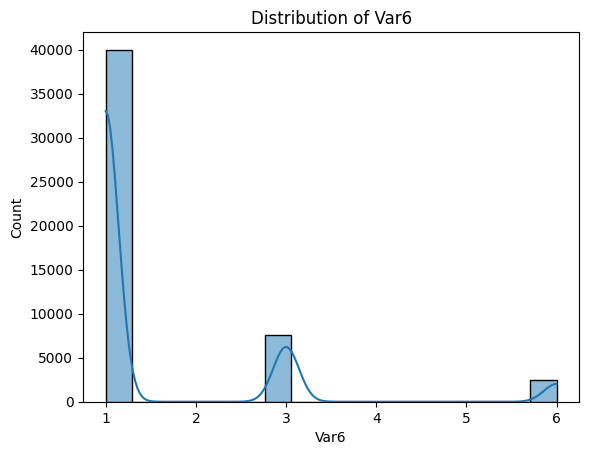

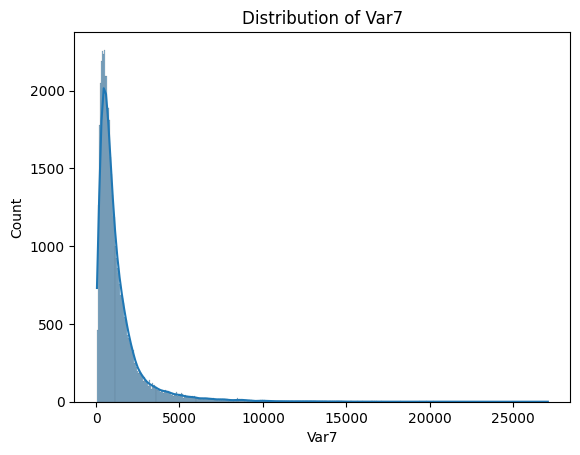

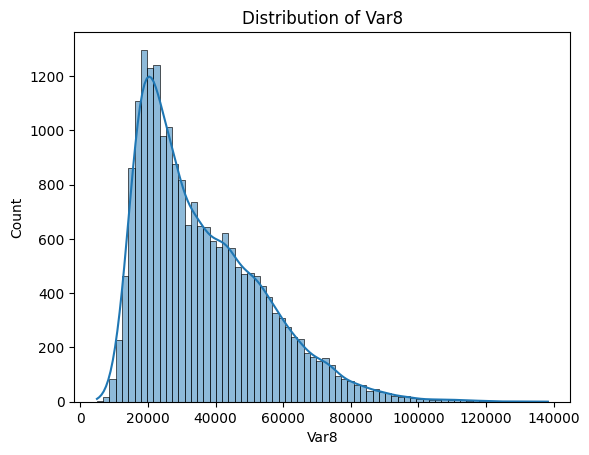

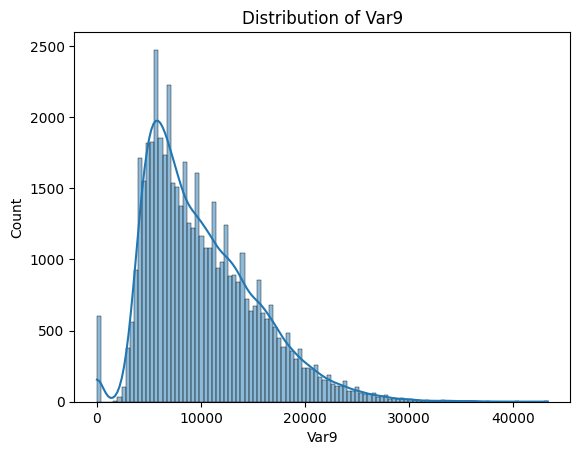

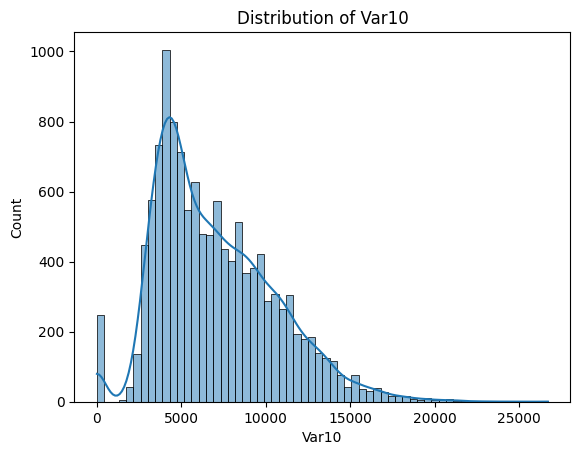

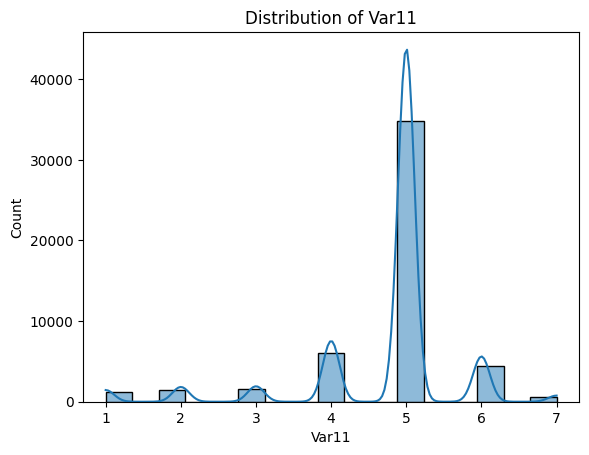

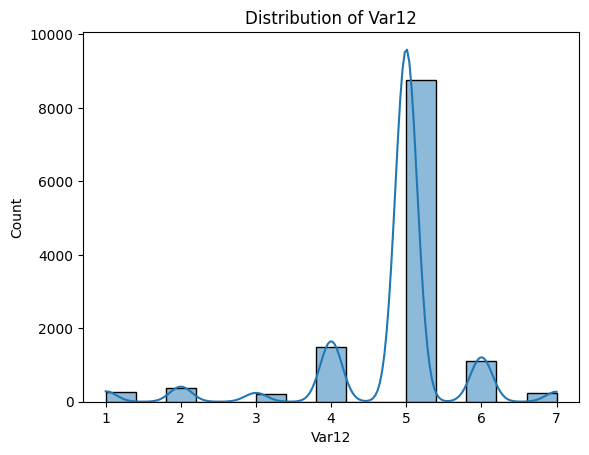

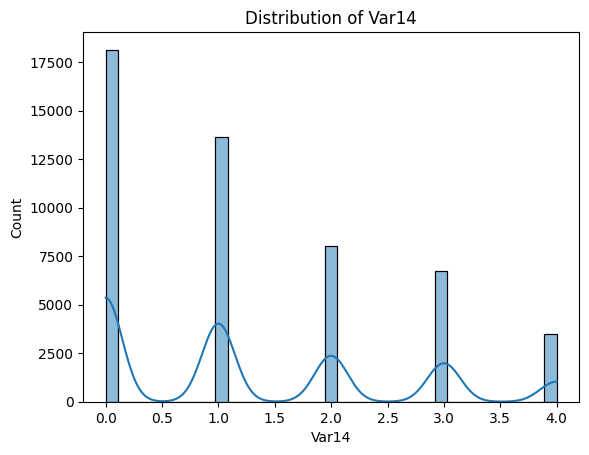

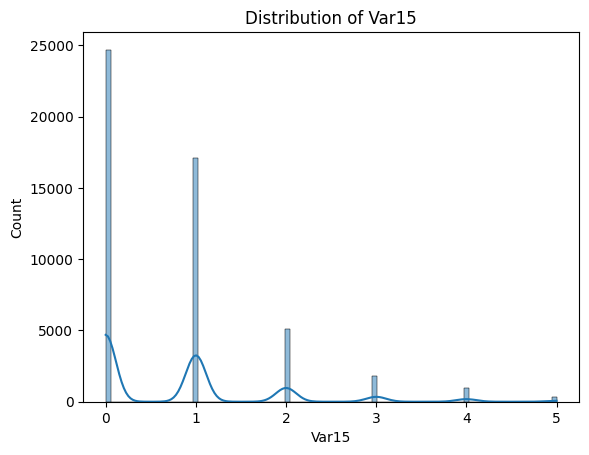

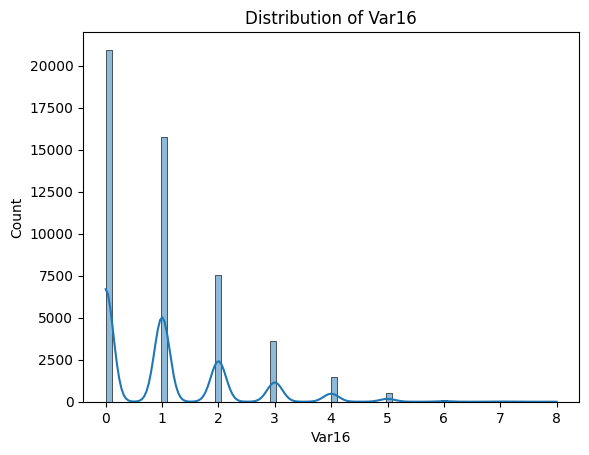

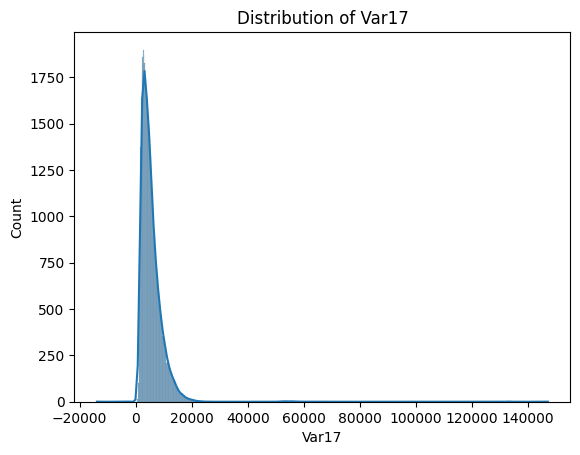

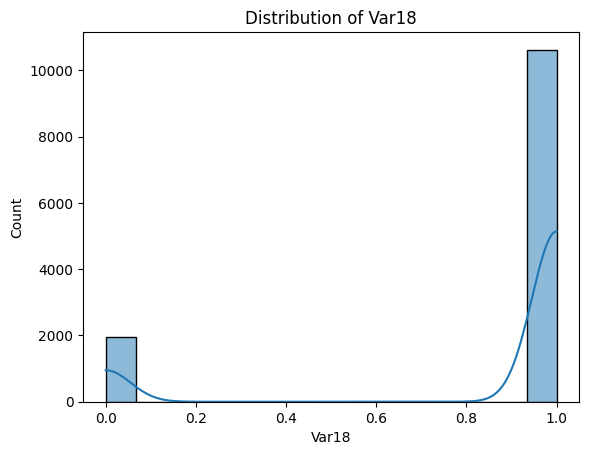

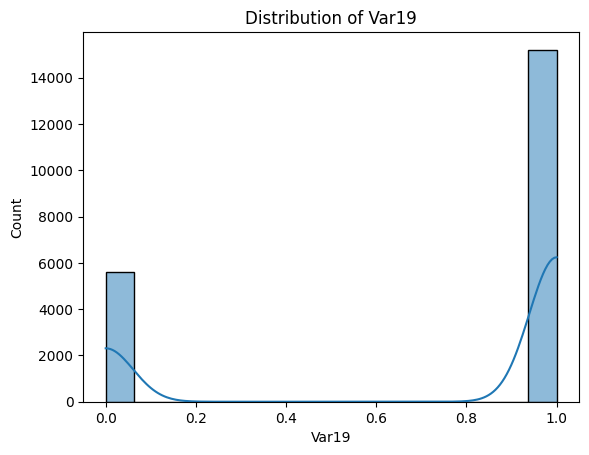

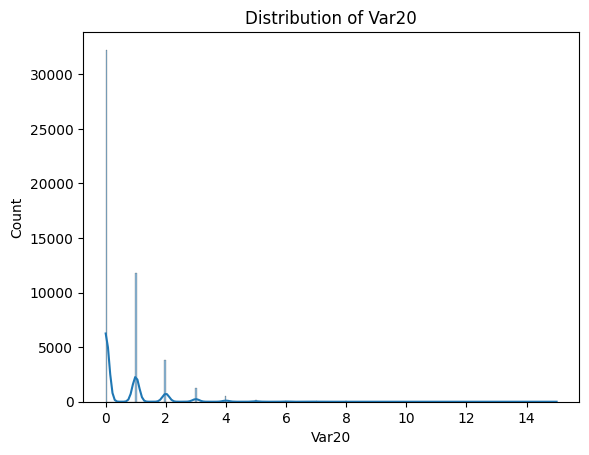

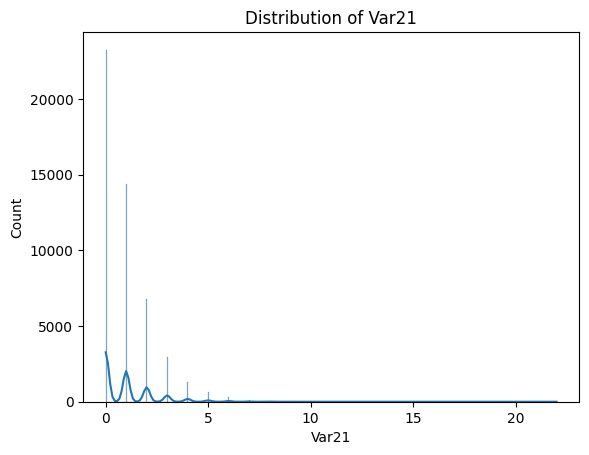

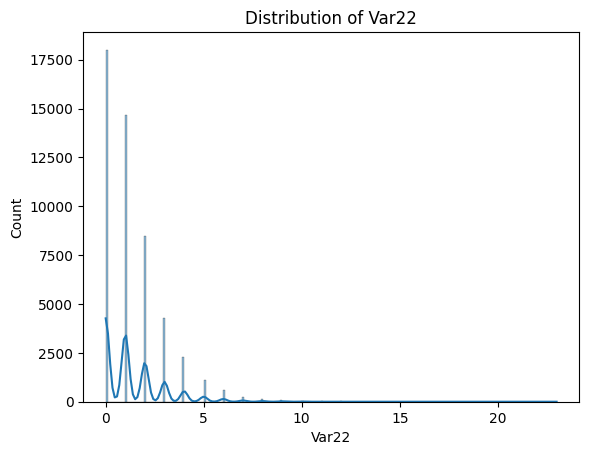

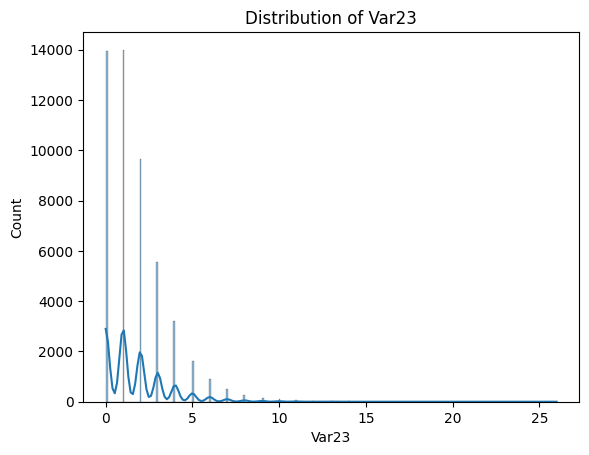

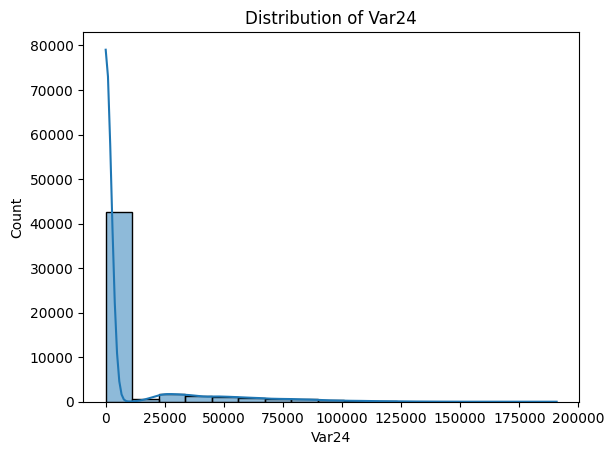

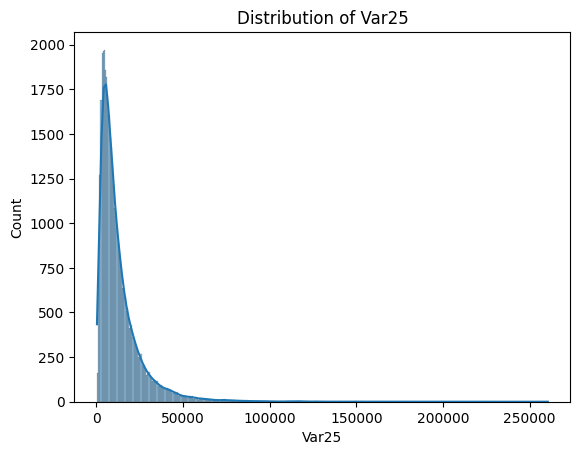

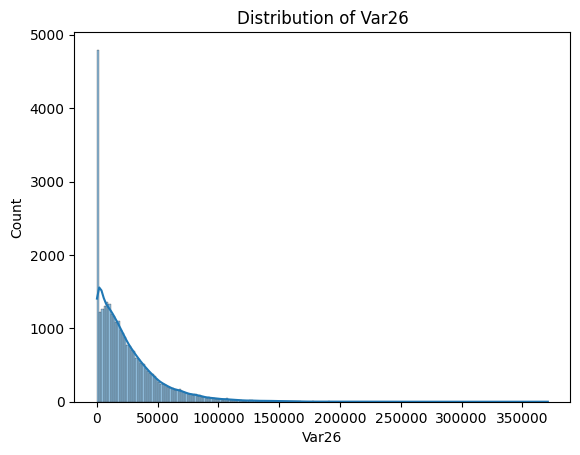

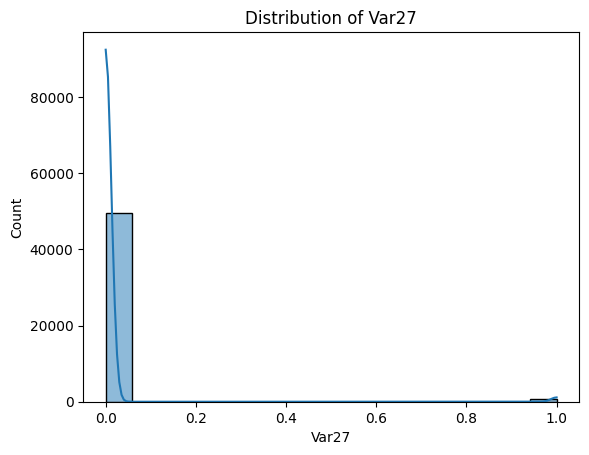

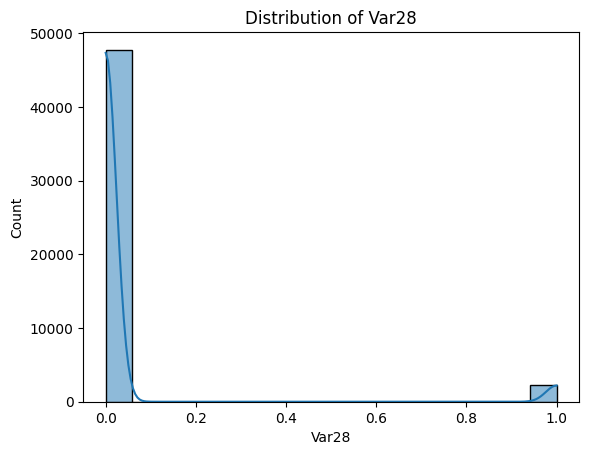

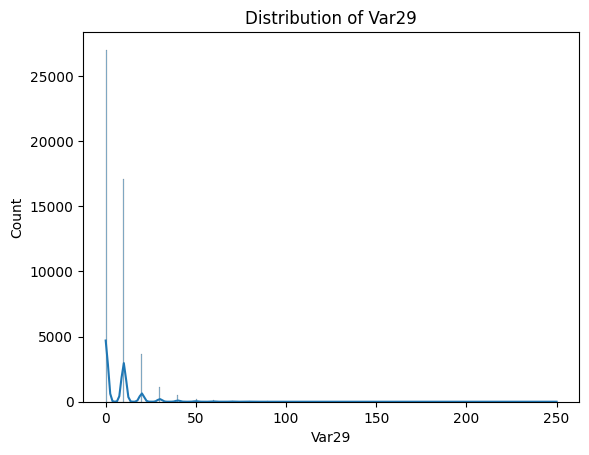

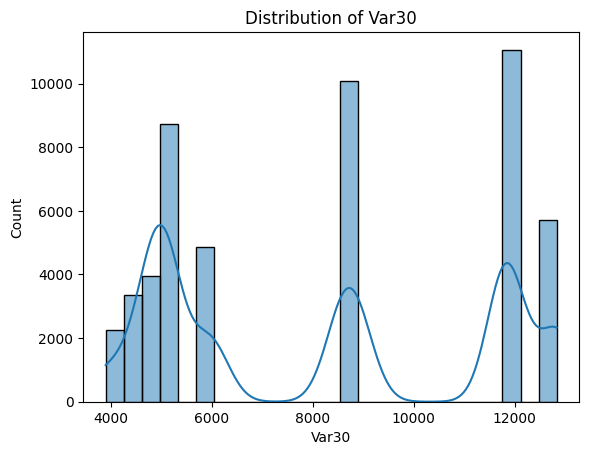

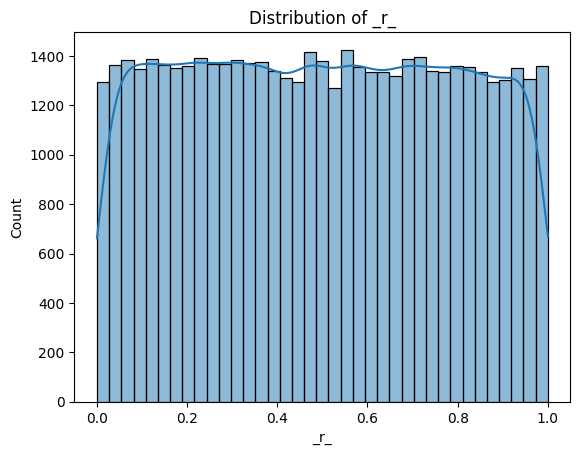

In [ ]:
# Loading the dataset
file_path = "https://files.challengerocket.com/files/lions-den-ing-2024/development_sample.csv"
data = pd.read_csv(file_path)
# Descriptive statistics
print("Descriptive statistics:")
print(data.describe())

# Missing values
print("\nMissing values:")
print(data.isnull().sum())

# Target rate
target_rate = data['target'].mean() * 100  # Multiply by 100 to get percentage
print(f"\nTarget rate (probability of default): {target_rate:.2f}%")

# Categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\n{feature} distribution:")
    print(data[feature].value_counts(normalize=True))

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Outlier detection (example for numerical features)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

# Data distributions (example for numerical features)
for feature in numerical_features:
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load example dataset (replace this with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate performance metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Calculate performance metrics for testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Performance metrics for training data:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

print("\nPerformance metrics for testing data:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")


Performance metrics for training data:
Accuracy: 0.97
Precision: 0.98
Recall: 0.97
F1 Score: 0.97

Performance metrics for testing data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the datasets
training_data_url = "https://files.challengerocket.com/files/lions-den-ing-2024/development_sample.csv"
testing_data_url = "https://files.challengerocket.com/files/lions-den-ing-2024/testing_sample.csv"

train_df = pd.read_csv(training_data_url)
test_df = pd.read_csv(testing_data_url)

# Separate features and target variable
X_train = train_df.drop(columns=['target'])  # Assuming 'Target' is the name of the target variable in the training data
y_train = train_df['target']

X_test = test_df.drop(columns=['target'])  # Assuming 'Target' is the name of the target variable in the testing data
y_test = test_df['target']

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate performance metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate performance metrics for testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the results
print("Performance metrics for training data:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

print("\nPerformance metrics for testing data:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")


ValueError: could not convert string to float: '01Feb2010 0:00:00'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load training and testing datasets
train_df = pd.read_excel("/content/Development sample.xlsx")
test_df = pd.read_csv("https://files.challengerocket.com/files/lions-den-ing-2024/testing_sample.csv")

train_df = train_df.drop(columns=['application_date'])
test_df = test_df.drop(columns=['application_date'])

# Split the development dataset into features (X) and target variable (y)
X_train = train_df.drop(columns=['target'])  # Adjust 'target_column' to your target variable name
y_train = train_df['target']

# Split the testing dataset into features (X_test) and target variable (y_test)
X_test = test_df.drop(columns=['target'])  # Adjust 'target_column' to your target variable name
y_test = test_df['target']

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate performance metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Calculate performance metrics for testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Performance metrics for training data:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

print("\nPerformance metrics for testing data:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")


ValueError: could not convert string to float: '10 400'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have predictions and true labels for both training and testing data
# y_train, y_test, y_train_pred, and y_test_pred are assumed to be defined

# Fit the logistic regression model with training data
model.fit(X_train, y_train)

# Calculate probabilities for the positive class
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for training and testing data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate AUC for training and testing data
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Testing AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Explain the discriminatory power of the model
print("Discriminatory Power:")
print(f"The AUC for the training data is {auc_train:.2f}, indicating good discriminatory power.")
print(f"The AUC for the testing data is {auc_test:.2f}, indicating good discriminatory power.")


ValueError: could not convert string to float: '10 400'